In [2]:
# load data, this data has been stationarized
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plot
df3 = pd.read_csv('bac_lags_12months_features.csv', header=0)
df5 = pd.read_csv('mybac_lags_12months_features.csv', header=0)
df3.head()
df5.head()

,Date,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1991-02-28,1.687537,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093
1,1991-03-31,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426
2,1991-04-30,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101
3,1991-05-31,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008
4,1991-06-30,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008,1.707245


In [3]:
# Split Data
df5=df5['Date']
bac_dates=df5.values
my_dates=bac_dates#slice all rows only date column
print(my_dates)
bac = df3.values
# split into lagged variables (features) and original time series data (target)
X3= bac[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y3 = bac[:,-1]  # slice all rows and last column, essentially separating out 't' column

['1991-02-28' '1991-03-31' '1991-04-30' '1991-05-31' '1991-06-30'
 '1991-07-31' '1991-08-31' '1991-09-30' '1991-10-31' '1991-11-30'
 '1991-12-31' '1992-01-31' '1992-02-29' '1992-03-31' '1992-04-30'
 '1992-05-31' '1992-06-30' '1992-07-31' '1992-08-31' '1992-09-30'
 '1992-10-31' '1992-11-30' '1992-12-31' '1993-01-31' '1993-02-28'
 '1993-03-31' '1993-04-30' '1993-05-31' '1993-06-30' '1993-07-31'
 '1993-08-31' '1993-09-30' '1993-10-31' '1993-11-30' '1993-12-31'
 '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30' '1994-05-31'
 '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30' '1994-10-31'
 '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28' '1995-03-31'
 '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31'
 '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31'
 '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30'
 '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30'
 '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30'
 '1997-05-

In [4]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
print(my_dates[0:10])
y3[0:10]

['1991-02-28' '1991-03-31' '1991-04-30' '1991-05-31' '1991-06-30'
 '1991-07-31' '1991-08-31' '1991-09-30' '1991-10-31' '1991-11-30']


array([1.28209293, 1.59542644, 1.69910097, 1.94100773, 1.70724475,
       1.65948939, 1.91634405, 1.76750135, 1.85432637, 1.70548344])

In [5]:
# Target Train-Test split
from pandas import read_csv

Y3 = y3
traintarget_size = int(len(Y3) * 0.75)   # Set split
train_target, test_target = Y3[0:traintarget_size], Y3[traintarget_size:len(Y3)]
print(train_target)

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

[ 1.28209293  1.59542644  1.69910097  1.94100773  1.70724475  1.65948939
  1.91634405  1.76750135  1.85432637  1.70548344  2.10625577  2.27475524
  2.46269894  2.43487215  2.55527711  2.48838496  2.63236976  2.54255152
  2.45183015  2.53760767  2.64483142  2.97497868  3.03403544  3.17429423
  3.15952873  3.32542062  3.02103448  2.96723604  3.12465     3.17187357
  3.35260868  3.35260868  3.0352509   3.18089771  3.30745935  3.4255836
  3.42842245  3.20921564  3.66516852  4.01695156  3.72679019  4.04415608
  4.18380594  3.67724729  3.7147696   3.52163744  3.541255    3.65896845
  4.07418108  4.14565897  4.08439445  5.02422094  4.75803566  4.97985554
  5.67832518  6.22187138  6.08309364  6.83572102  6.65646648  6.6803627
  7.27589893  7.90483189  7.8801713   8.00348663  8.38300419  8.72542667
  8.63665104  9.06455708  9.8340683  10.81225586 10.47581577 11.5877018
 12.86034012 12.02328873 13.07938576 12.7544384  14.14244652 15.59365368
 13.08826637 13.70773888 13.25081635 13.30620098 13.64

In [6]:
# Features Train-Test split

trainfeature_size = int(len(X3) * 0.75)
train_feature, test_feature = X3[0:trainfeature_size], X3[trainfeature_size:len(X3)]
print('Observations for feature: %d' % (len(X3)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 258
Testing Observations for feature: 87


DECISION TREE REGRESSOR

In [35]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
dr = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
dr.fit(train_feature, train_target)

# Check the score on train and test
print(dr.score(train_feature, train_target))
print(dr.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.9025399684274487


In [36]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# Run grid search

grid = { 'max_depth': [15], 'max_features': [8], 'random_state': [50]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    dr.set_params(**g)  # ** is "unpacking" the dictionary
    dr.fit(train_feature, train_target)
    test_scores.append(dr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.9211938419736232 {'random_state': 50, 'max_features': 8, 'max_depth': 15}


In [37]:
dr=DecisionTreeRegressor(max_depth=15, max_features=8, random_state=50)
dr.fit(train_feature, train_target)
print(dr.score(train_feature, train_target))
print(dr.score(test_feature,test_target)) 

0.9999999999998191
0.9211938419736232


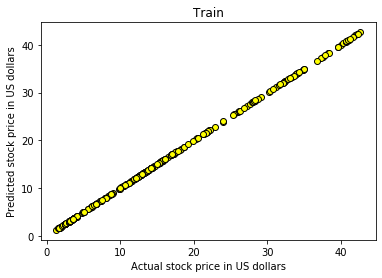

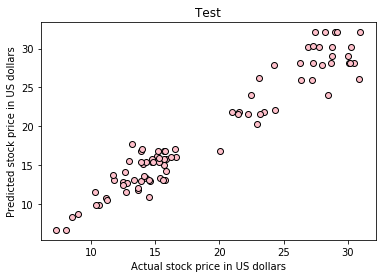

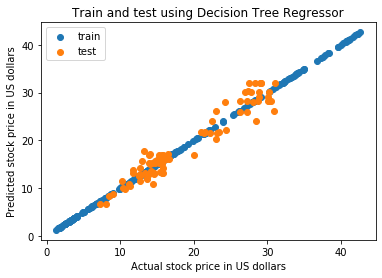

In [38]:
# Use the best hyperparameters from before to fit a decision tree model
dr = DecisionTreeRegressor( max_depth=15, max_features = 8, random_state=50)
dr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction1 = dr.predict(train_feature)
test_prediction1 =dr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions

plot.scatter(train_target, train_prediction1, label='train', c="yellow", edgecolor ="black")
plot.title('Train')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')
plot.show()
plot.scatter(test_target, test_prediction1, label='test', c="pink", edgecolor="black")
plot.title('Test')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')
plot.show()
plot.scatter(train_target, train_prediction1, label='train')
plot.scatter(test_target, test_prediction1, label='test')
plot.title('Train and test using Decision Tree Regressor')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')

plot.legend()
plot.show()



In [39]:
df=pd.DataFrame({'Actual':test_target, 'Predicted':test_prediction1})
df

,Actual,Predicted
0,7.294194,6.700799
1,8.071131,6.700799
2,8.519021,8.383004
3,9.012611,8.725427
4,10.622932,9.834068
5,10.357589,9.947886
6,10.284482,11.587702
7,11.154500,10.812256
8,11.273548,10.475816
9,12.509886,12.860340


In [40]:
#calculating diff types of errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, test_prediction1))
print('Mean Squared Error:', metrics.mean_squared_error(test_target, test_prediction1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, test_prediction1)))

Mean Absolute Error: 1.5272238071609199
Mean Squared Error: 3.809054577018094
Root Mean Squared Error: 1.9516799371357216


In [41]:
#calculating accuracy of prediction of our model on test data
# Calculate the absolute errors
errors = abs(test_prediction1 - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_target)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.53 degrees.
Accuracy: 91.7 %.


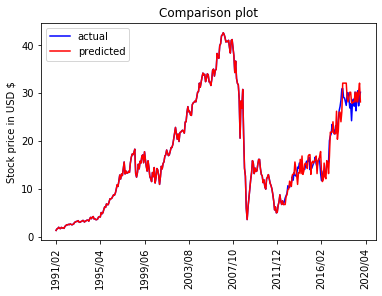

In [67]:
x_data = [0,50,100,150,200,250,300,350]
x_labels=["1991/02","1995/04","1999/06","2003/08","2007/10","2011/12","2016/02","2020/04"]
#print(x_data)
new_list1=list(train_target)+list(test_target)
plot.plot(new_list1,c='blue')

new_list2=list(train_prediction1)+list(test_prediction1)
plot.plot(new_list2,c='red')


plot.title("Comparison plot")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.xticks(x_data, x_labels, rotation='vertical')
plot.show()

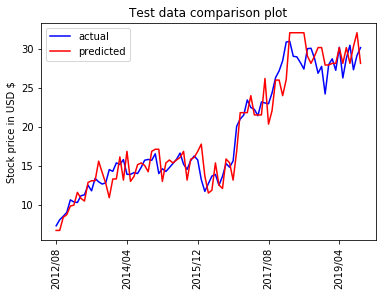

In [69]:
x_data_test = [0,20,40,60,80]
x_labels_test=["2012/08","2014/04","2015/12","2017/08","2019/04"]
plot.plot(test_target,c="blue")
plot.plot(test_prediction1,c="red")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.title("Test data comparison plot")
plot.xticks(x_data_test, x_labels_test, rotation='vertical')
plot.show()

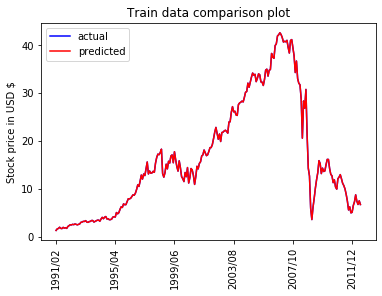

In [70]:
x_data_train = [0,50,100,150,200,250]
x_labels_train=["1991/02","1995/04","1999/06","2003/08","2007/10","2011/12"]
plot.plot(train_target,c="blue")
plot.plot(train_prediction1,c="red")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.title("Train data comparison plot")
plot.xticks(x_data_train, x_labels_train, rotation='vertical')
plot.show()

RANDOM FOREST REGRESSOR

In [7]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9959266876104892
0.9461664073301783


In [58]:

from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [16], 'max_features': [8], 'random_state': [5]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.9520659010108531 {'random_state': 5, 'n_estimators': 200, 'max_features': 8, 'max_depth': 16}


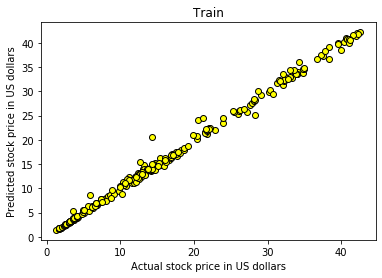

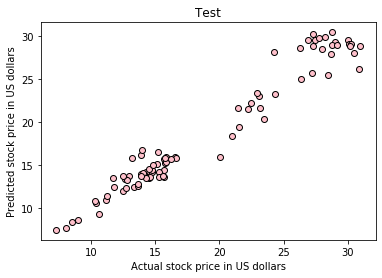

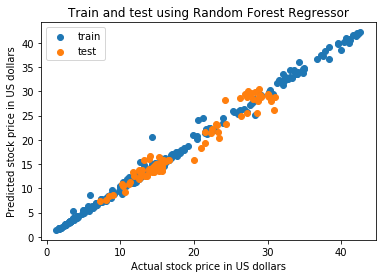

In [63]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=16, max_features = 8, random_state=5)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

plot.scatter(train_target, train_prediction, label='train', c="yellow", edgecolor ="black")
plot.title('Train')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')
plot.show()
plot.scatter(test_target, test_prediction, label='test', c="pink", edgecolor="black")
plot.title('Test')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')
plot.show()
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.title('Train and test using Random Forest Regressor')
plot.xlabel('Actual stock price in US dollars')
plot.ylabel('Predicted stock price in US dollars')

plot.legend()
plot.show()

In [64]:
df=pd.DataFrame({'Actual':test_target, 'Predicted':test_prediction})
df

,Actual,Predicted
0,7.294194,7.460483
1,8.071131,7.628713
2,8.519021,8.377649
3,9.012611,8.607544
4,10.622932,9.244062
5,10.357589,10.542061
6,10.284482,10.847014
7,11.154500,10.885403
8,11.273548,11.384856
9,12.509886,11.934017


In [65]:
#calculating diff types of errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(test_target, test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, test_prediction)))

Mean Absolute Error: 1.125164291704509
Mean Squared Error: 2.3168696929589805
Root Mean Squared Error: 1.5221267006918249


In [66]:
#calculating accuracy of prediction of our model on test data
# Calculate the absolute errors
errors = abs(test_prediction - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_target)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.13 degrees.
Accuracy: 94.08 %.


In [13]:
#future_pred=rfr.predict([['']])
#print("Predicted stock price:",future_pred)
print((list(train_target)))


[1.282092929, 1.59542644, 1.699100971, 1.9410077330000002, 1.707244754, 1.659489393, 1.916344047, 1.767501354, 1.8543263669999999, 1.7054834369999998, 2.10625577, 2.274755239, 2.462698936, 2.43487215, 2.555277109, 2.488384962, 2.6323697569999998, 2.5425515169999997, 2.451830149, 2.53760767, 2.644831419, 2.974978685, 3.0340354439999997, 3.174294233, 3.159528732, 3.3254206180000003, 3.021034479, 2.9672360419999997, 3.124650002, 3.1718735689999997, 3.3526086810000004, 3.3526086810000004, 3.035250902, 3.1808977130000002, 3.3074593539999997, 3.425583601, 3.4284224510000003, 3.209215641, 3.665168524, 4.016951561, 3.72679019, 4.044156075, 4.183805943, 3.677247286, 3.714769602, 3.52163744, 3.541254997, 3.6589684489999996, 4.07418108, 4.14565897, 4.084394455, 5.024220943, 4.75803566, 4.979855537, 5.678325176, 6.221871376, 6.083093643, 6.835721016, 6.656466484, 6.680362701, 7.275898933, 7.904831886, 7.880171299, 8.003486633, 8.383004189, 8.725426674, 8.636651039, 9.064557076, 9.834068298, 10.812

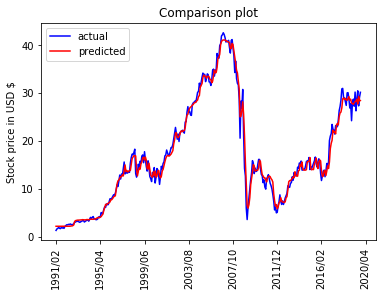

In [14]:
x_data = [0,50,100,150,200,250,300,350]
x_labels=["1991/02","1995/04","1999/06","2003/08","2007/10","2011/12","2016/02","2020/04"]
new_list1=list(train_target)+list(test_target)
plot.plot(new_list1,c='blue')
new_list2=list(train_prediction)+list(test_prediction)
plot.plot(new_list2,c='red')
plot.title("Comparison plot")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.xticks(x_data, x_labels, rotation='vertical')
plot.show()


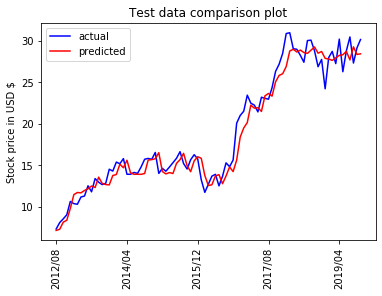

In [15]:
x_data_test = [0,20,40,60,80]
x_labels_test=["2012/08","2014/04","2015/12","2017/08","2019/04"]
plot.plot(test_target,c="blue")
plot.plot(test_prediction,c="red")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.title("Test data comparison plot")
plot.xticks(x_data_test, x_labels_test, rotation='vertical')
plot.show()

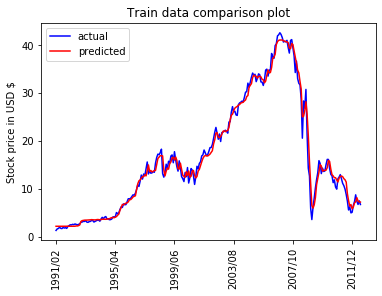

In [16]:
x_data_train = [0,50,100,150,200,250]
x_labels_train=["1991/02","1995/04","1999/06","2003/08","2007/10","2011/12"]
plot.plot(train_target,c="blue")
plot.plot(train_prediction,c="red")
plot.ylabel('Stock price in USD $')
plot.legend(['actual','predicted'],loc="upper left")
plot.title("Train data comparison plot")
plot.xticks(x_data_train, x_labels_train, rotation='vertical')
plot.show()

STATISTICAL MODEL - AR MODEL

In [74]:
from pandas import read_csv
from matplotlib import pyplot
mybac22 = read_csv('df_bankofamerica.csv', index_col=0, parse_dates=True)
mybac22= mybac22.resample(rule='M').last()

mybac22.head()

,Adj Close Price
Date,
1990-01-31,1.542054
1990-02-28,1.687537
1990-03-31,1.469485
1990-04-30,1.441042
1990-05-31,1.525887


In [75]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(mybac22, order=(1,0))  # AR(1) and MA(1)
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print(res.params)

                              ARMA Model Results                              
Dep. Variable:        Adj Close Price   No. Observations:                  358
Model:                     ARMA(1, 0)   Log Likelihood                -668.617
Method:                       css-mle   S.D. of innovations              1.557
Date:                Sun, 06 Jun 2021   AIC                           1343.234
Time:                        16:46:55   BIC                           1354.876
Sample:                    01-31-1990   HQIC                          1347.864
                         - 10-31-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.1770      7.402      2.185      0.030       1.668      30.686
ar.L1.Adj Close Price     0.9913      0.006    153.824      0.000       0.979       1.004
        

In [76]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt

mod = ARMA(mybac22, order=(1,0))
res = mod.fit()



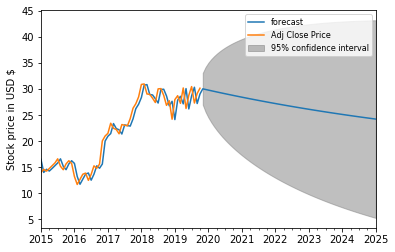

In [77]:
# Plot the original series and the forecasted series
#res.plot_predict()
res.plot_predict(start='2015', end='2025')
plt.ylabel('Stock price in USD $')
plt.legend(fontsize=8)
plt.show();